In [1]:

import pandas as pd

# Load the dataset
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\GDP_income_classification_disaster_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Show the first few rows of the dataset to understand its structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Display unique values in categorical columns (if any)
print("\nUnique values in categorical columns:")
print(df.select_dtypes(include=['object']).nunique())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISO                                        15422 non-null  object 
 1   Country_x                                  15422 non-null  object 
 2   Disaster Subgroup                          15422 non-null  object 
 3   Disaster Type                              15422 non-null  object 
 4   Disaster Subtype                           15422 non-null  object 
 5   Event Name                                 3690 non-null   object 
 6   Subregion                                  15422 non-null  object 
 7   Region                                     15422 non-null  object 
 8   Location                                   13977 non-null  object 
 9   OFDA/BHA Response                          15422 non-null  object 
 10  A

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\GDP_income_classification_disaster_dataset.csv"
df = pd.read_csv(file_path)


In [2]:
# Check missing values percentage
missing_values = df.isnull().sum() / len(df) * 100
print("Missing Values Percentage:\n", missing_values[missing_values > 0])



Missing Values Percentage:
 Event Name                                   76.073142
Location                                      9.369732
AID Contribution ('000 US$)                  95.110881
Magnitude                                    70.217871
Magnitude Scale                              12.170925
Latitude                                     84.593438
Longitude                                    84.593438
Total Deaths                                 29.114252
No. Injured                                  74.257554
No. Affected                                 38.179224
No. Homeless                                 85.248347
Total Affected                               23.855531
Reconstruction Costs ('000 US$)              99.747115
Reconstruction Costs, Adjusted ('000 US$)    99.747115
Insured Damage ('000 US$)                    92.938659
Insured Damage, Adjusted ('000 US$)          92.938659
Total Damage ('000 US$)                      67.034107
Total Damage, Adjusted ('000 US$)    

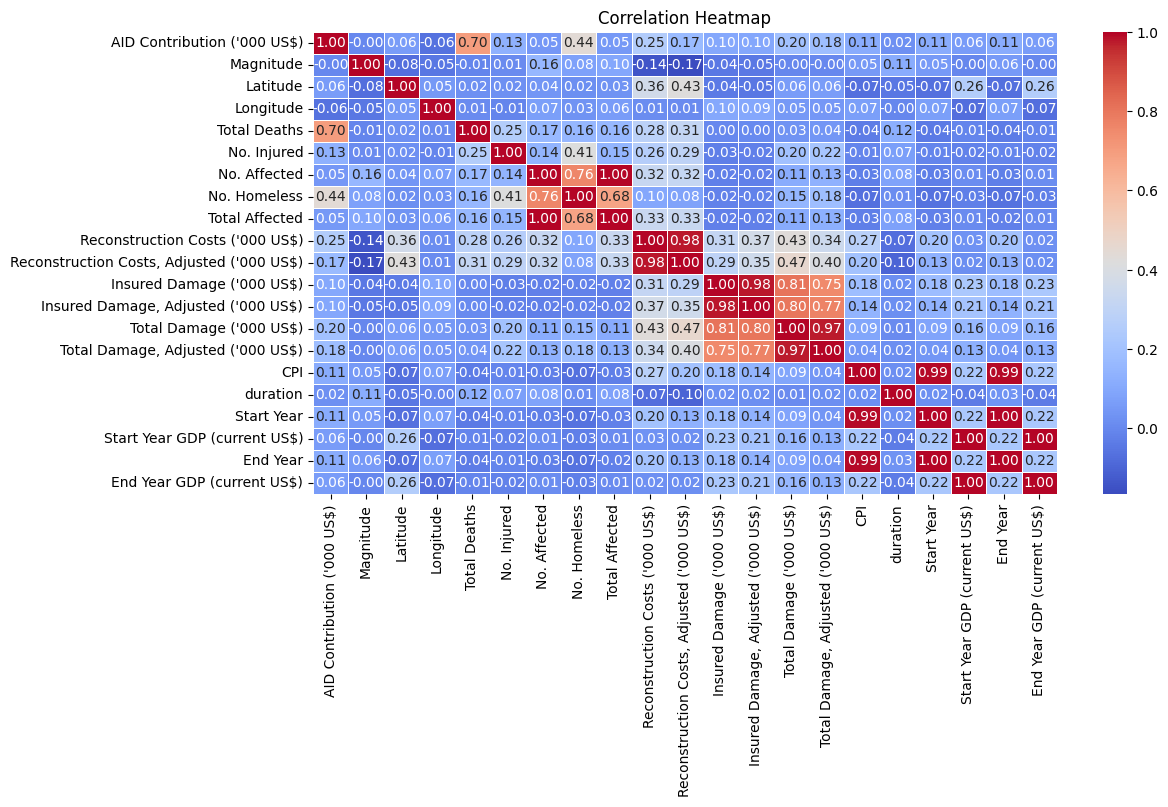

In [3]:
# Correlation analysis (for numerical features)
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




In [10]:
# Check patterns by disaster type, region, income classification
category_cols = ['Disaster Type', 'Region', 'world_banks_income_classification']
for col in category_cols:
    print(f"Missing Values Analysis by {col}:")
    print(df.groupby(col)[missing_values.index].apply(lambda x: x.isnull().sum()))
    print('\n')



Missing Values Analysis by Disaster Type:
                             ISO  Country_x  Disaster Subgroup  Disaster Type  \
Disaster Type                                                                   
Animal incident                0          0                  0              0   
Drought                        0          0                  0              0   
Earthquake                     0          0                  0              0   
Epidemic                       0          0                  0              0   
Extreme temperature            0          0                  0              0   
Flood                          0          0                  0              0   
Glacial lake outburst flood    0          0                  0              0   
Impact                         0          0                  0              0   
Infestation                    0          0                  0              0   
Mass movement (dry)            0          0                  0     

In [9]:
print(df.columns)
df.columns = df.columns.str.strip()


Index(['ISO', 'Country_x', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Event Name', 'Subregion', 'Region', 'Location',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Total Deaths', 'No. Injured', 'No. Affected',
       'No. Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'start_date', 'end_date', 'duration', 'Start Year',
       'Start Year GDP (current US$)', 'End Year',
       'End Year GDP (current US$)', 'Country_y',
       'world_banks_income_classification', 'developed'],
      dtype='object')


In [21]:
# Machine learning-based imputation (Optional)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Replace original missing values
for col in df_imputed.columns:
    df[col] = df_imputed[col]

print("Missing values filled using KNN Imputer!")

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3264402138.py, line 2)

In [4]:

df.columns = df.columns.str.replace(r"[\(\)'’]", "", regex=True)  # Removes parentheses and apostrophes


In [5]:
print(df.columns)


Index(['ISO', 'Country_x', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Event Name', 'Subregion', 'Region', 'Location',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution 000 US$', 'Magnitude', 'Magnitude Scale', 'Latitude',
       'Longitude', 'Total Deaths', 'No. Injured', 'No. Affected',
       'No. Homeless', 'Total Affected', 'Reconstruction Costs 000 US$',
       'Reconstruction Costs, Adjusted 000 US$', 'Insured Damage 000 US$',
       'Insured Damage, Adjusted 000 US$', 'Total Damage 000 US$',
       'Total Damage, Adjusted 000 US$', 'CPI', 'start_date', 'end_date',
       'duration', 'Start Year', 'Start Year GDP current US$', 'End Year',
       'End Year GDP current US$', 'Country_y',
       'world_banks_income_classification', 'developed'],
      dtype='object')


KeyError: 'total_damage_000_us'

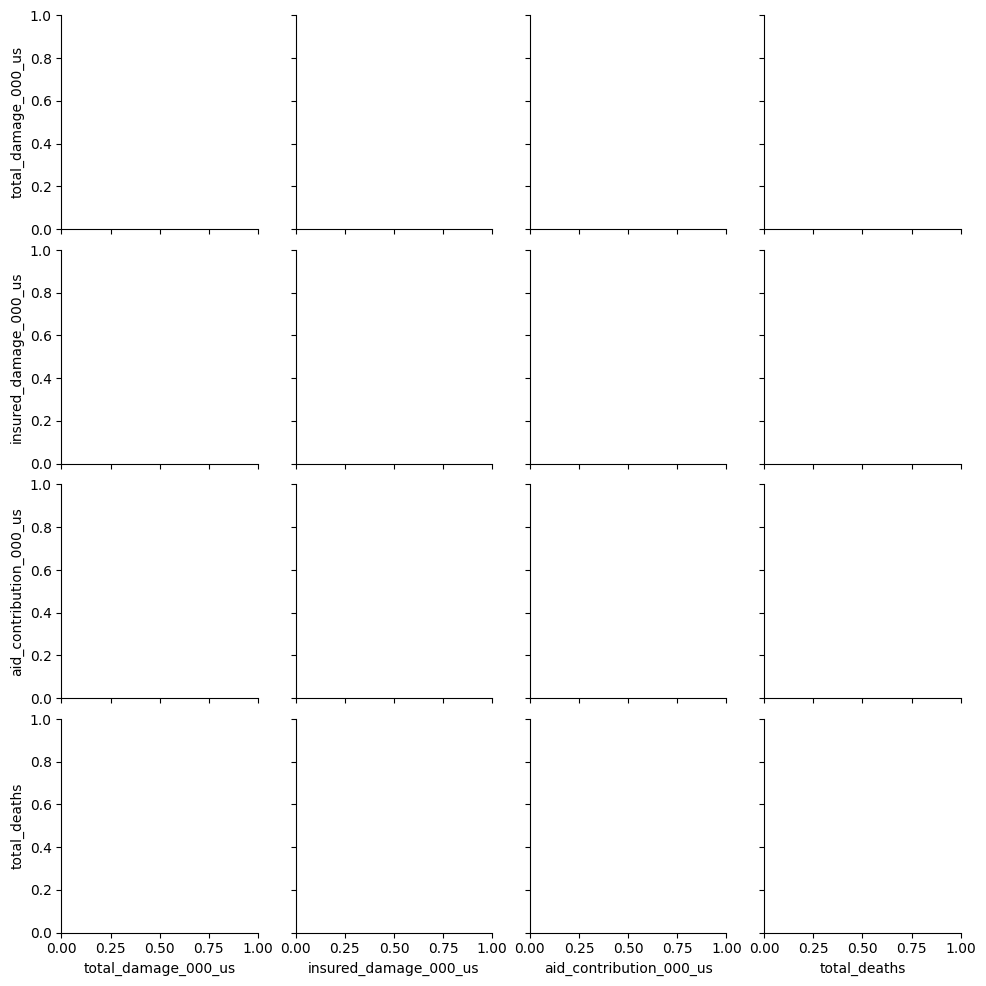

In [6]:
sns.pairplot(df, vars=['total_damage_000_us', 'insured_damage_000_us', 'aid_contribution_000_us', 'total_deaths'])
plt.show()



In [7]:
# Machine learning-based imputation (Optional)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Replace original missing values
for col in df_imputed.columns:
    df[col] = df_imputed[col]

print("Missing values filled using KNN Imputer!")

Missing values filled using KNN Imputer!


In [8]:
print(df.columns)


Index(['ISO', 'Country_x', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Event Name', 'Subregion', 'Region', 'Location',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution 000 US$', 'Magnitude', 'Magnitude Scale', 'Latitude',
       'Longitude', 'Total Deaths', 'No. Injured', 'No. Affected',
       'No. Homeless', 'Total Affected', 'Reconstruction Costs 000 US$',
       'Reconstruction Costs, Adjusted 000 US$', 'Insured Damage 000 US$',
       'Insured Damage, Adjusted 000 US$', 'Total Damage 000 US$',
       'Total Damage, Adjusted 000 US$', 'CPI', 'start_date', 'end_date',
       'duration', 'Start Year', 'Start Year GDP current US$', 'End Year',
       'End Year GDP current US$', 'Country_y',
       'world_banks_income_classification', 'developed'],
      dtype='object')


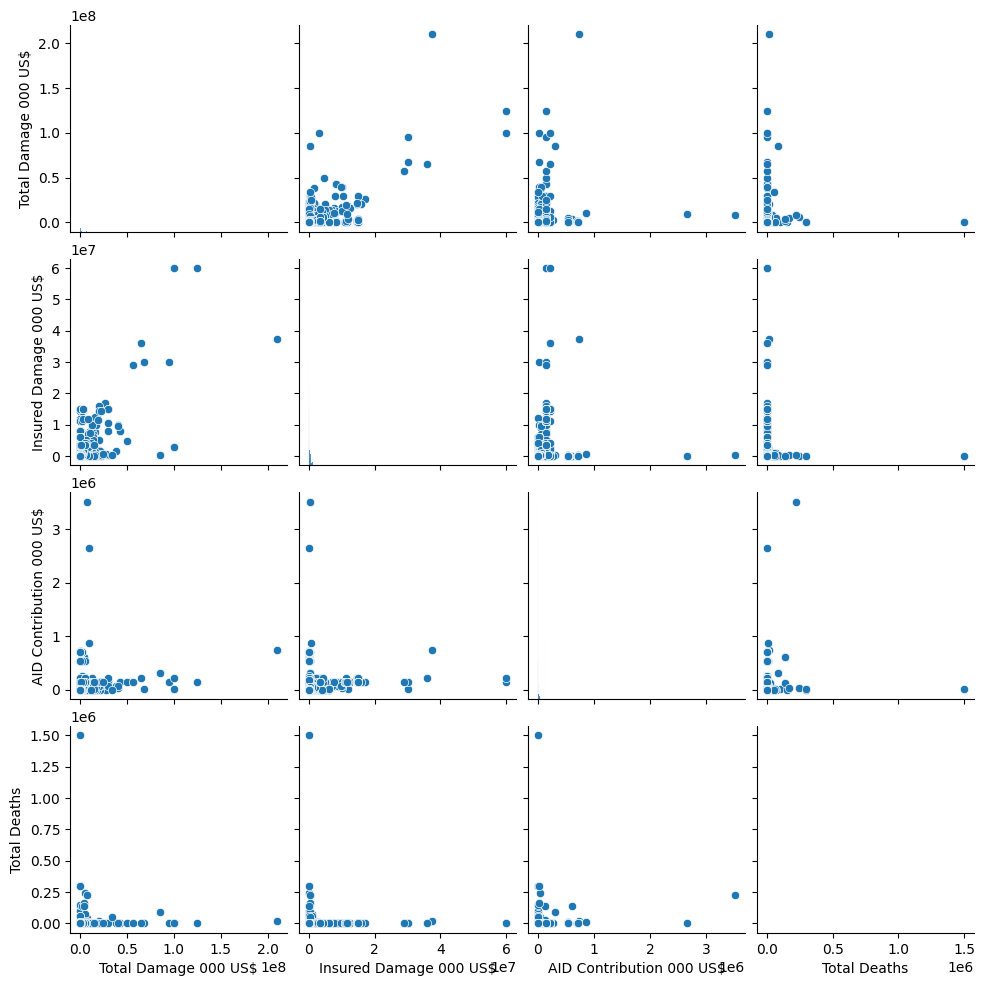

In [10]:
sns.pairplot(df, vars=['Total Damage 000 US$', 'Insured Damage 000 US$', 'AID Contribution 000 US$', 'Total Deaths'])
plt.show()


In [13]:
# Check the imputed DataFrame
print(df_imputed.head())

   AID Contribution 000 US$  Magnitude   Latitude  Longitude  Total Deaths  \
0                    1338.0   6285.246  11.712152   -27.9684       10000.0   
1                    1338.0   6285.246  11.712152   -27.9684        3000.0   
2                    1338.0   6285.246  11.712152   -27.9684        5149.0   
3                    1046.2      9.500 -38.143000   -73.4070        6000.0   
4                    2171.2      5.600  36.000000     4.1000          57.0   

   No. Injured  No. Affected  No. Homeless  Total Affected  \
0      15736.0       84787.8      256210.0         84787.8   
1      15736.0       84787.8      256210.0         84787.8   
2      15736.0      200000.0      256800.0        200000.0   
3       3000.0     2000000.0       26308.0       2003000.0   
4       1050.6       69868.0        1250.0          1250.0   

   Reconstruction Costs 000 US$  ...  Insured Damage 000 US$  \
0                       59000.0  ...                110300.0   
1                       59000.

In [12]:
# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
ISO                                           0
Country_x                                     0
Disaster Subgroup                             0
Disaster Type                                 0
Disaster Subtype                              0
Event Name                                11732
Subregion                                     0
Region                                        0
Location                                   1445
OFDA/BHA Response                             0
Appeal                                        0
Declaration                                   0
AID Contribution 000 US$                      0
Magnitude                                     0
Magnitude Scale                            1877
Latitude                                      0
Longitude                                     0
Total Deaths                                  0
No. Injured                                   0
No. Affected                                  0
No. Home

In [15]:
pd.to_csv(r'D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\Cleaned_data\missing_values_filled_data')

AttributeError: module 'pandas' has no attribute 'to_csv'

In [16]:
df_imputed.to_csv(r'D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\Cleaned_data\missing_values_filled_data.csv', index=False)



In [18]:
import pandas as pd

# File paths
co_emissions_per_capita_path = "D:/work/college/E-Coders_SAS_Curiosity_Cup/datasets/Raw_data/co-emissions-per-capita.csv"
annual_co2_emissions_per_country_path = "D:/work/college/E-Coders_SAS_Curiosity_Cup/datasets/Raw_data/annual-co2-emissions-per-country.csv"
gdp_income_disaster_path = "D:/work/college/E-Coders_SAS_Curiosity_Cup/datasets/merging_datasets/GDP_income_classification_disaster_dataset.csv"

# Load datasets
co_emissions_per_capita = pd.read_csv(co_emissions_per_capita_path)
annual_co2_emissions_per_country = pd.read_csv(annual_co2_emissions_per_country_path)
gdp_income_disaster = pd.read_csv(gdp_income_disaster_path)

# Display basic information for each dataset
def display_info(df, name):
    print(f"\nDataset: {name}")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns)
    print("Data Types:", df.dtypes)
    print("Sample rows:")
    print(df.head(), "\n")

# Display details for all datasets
display_info(co_emissions_per_capita, "co-emissions-per-capita")
display_info(annual_co2_emissions_per_country, "annual-co2-emissions-per-country")
display_info(gdp_income_disaster, "GDP_income_classification_disaster_dataset")



Dataset: co-emissions-per-capita
Shape: (12609, 4)
Columns: Index(['country', 'ISO_Code', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')
Data Types: country                               object
ISO_Code                              object
Year                                   int64
Annual CO₂ emissions (per capita)    float64
dtype: object
Sample rows:
       country ISO_Code  Year  Annual CO₂ emissions (per capita)
0  Afghanistan      AFG  1968                           0.113731
1  Afghanistan      AFG  1969                           0.085431
2  Afghanistan      AFG  1970                           0.147952
3  Afghanistan      AFG  1971                           0.163694
4  Afghanistan      AFG  1972                           0.129103 


Dataset: annual-co2-emissions-per-country
Shape: (29137, 4)
Columns: Index(['Country', 'ISO_Code', 'Year', 'Annual CO₂ emissions'], dtype='object')
Data Types: Country                  object
ISO_Code                 object
Year       

In [21]:
# Rename 'Start Year' to 'Year' in the parent dataset to ensure consistency
gdp_income_disaster.rename(columns={'Start Year': 'Year'}, inplace=True)

# Clean the column names for the other datasets as well
co_emissions_per_capita.rename(columns={'ISO_Code': 'ISO', 'Annual CO₂ emissions (per capita)': 'Annual CO₂ emissions per capita'}, inplace=True)
annual_co2_emissions_per_country.rename(columns={'Country': 'Country_x', 'Annual CO₂ emissions': 'Annual CO₂ emissions per country'}, inplace=True)

# Merge the datasets ensuring the parent dataset ('GDP_income_classification_disaster_dataset') is not cut off
merged_data = pd.merge(gdp_income_disaster, co_emissions_per_capita, on=['ISO', 'Year'], how='left')
merged_data = pd.merge(merged_data, annual_co2_emissions_per_country, on=['ISO', 'Year'], how='left')


# Save the final merged dataset
merged_data.to_csv(r'D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset.csv', index=False)

# Display the dataset details
print("Final Dataset Shape:", merged_data.shape)
print("Final Dataset Columns:", merged_data.columns)
print("Sample rows of the final dataset:")
print(merged_data.head())


KeyError: 'ISO'

In [20]:
# Check if the 'Year' column exists in each dataset
print("co_emissions_per_capita columns:", co_emissions_per_capita.columns)
print("annual_co2_emissions_per_country columns:", annual_co2_emissions_per_country.columns)
print("GDP_income_classification_disaster_dataset columns:", gdp_income_disaster.columns)


co_emissions_per_capita columns: Index(['country', 'ISO', 'Year', 'Annual CO₂ emissions per capita'], dtype='object')
annual_co2_emissions_per_country columns: Index(['Country_x', 'ISO_Code', 'Year', 'Annual CO₂ emissions per country'], dtype='object')
GDP_income_classification_disaster_dataset columns: Index(['ISO', 'Country_x', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Event Name', 'Subregion', 'Region', 'Location',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Total Deaths', 'No. Injured', 'No. Affected',
       'No. Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'start_date', 'end_date', 'duration', 'Start Year',
       'Star

In [22]:
# Ensure 'ISO' is consistent across all datasets
gdp_income_disaster.rename(columns={'ISO': 'ISO'}, inplace=True)  # If necessary, confirm the 'ISO' column is named correctly
co_emissions_per_capita.rename(columns={'ISO_Code': 'ISO'}, inplace=True)
annual_co2_emissions_per_country.rename(columns={'ISO_Code': 'ISO'}, inplace=True)

# Now we can merge the datasets ensuring no mismatch on 'ISO' and 'Year' columns
merged_data = pd.merge(gdp_income_disaster, co_emissions_per_capita, on=['ISO', 'Year'], how='left')
merged_data = pd.merge(merged_data, annual_co2_emissions_per_country, on=['ISO', 'Year'], how='left')

# Save the final merged dataset
merged_data.to_csv(r'D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset.csv', index=False)

# Display the dataset details
print("Final Dataset Shape:", merged_data.shape)
print("Final Dataset Columns:", merged_data.columns)
print("Sample rows of the final dataset:")
print(merged_data.head())


Final Dataset Shape: (15422, 43)
Final Dataset Columns: Index(['ISO', 'Country_x_x', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Event Name', 'Subregion', 'Region', 'Location',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Total Deaths', 'No. Injured', 'No. Affected',
       'No. Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'start_date', 'end_date', 'duration', 'Year',
       'Start Year GDP (current US$)', 'End Year',
       'End Year GDP (current US$)', 'Country_y',
       'world_banks_income_classification', 'developed', 'country',
       'Annual CO₂ emissions per capita', 'Country_x_y',
       'Annual CO₂ emissions per countr

In [23]:
# Step 1: Load the Population dataset
population_data = pd.read_csv(r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\Raw_data\Population.csv")

# Step 2: Check the structure of the Population data
print(population_data.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2014         2015         2016         2017  \
0      58190.0  .

In [24]:
# Step 1: Reshape the Population data from wide format to long format
population_data_long = population_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                           var_name='Year', value_name='Population')

# Step 2: Clean the 'Year' column to match the format in the final dataset (convert to int)
population_data_long['Year'] = population_data_long['Year'].astype(int)

# Step 3: Merge the reshaped Population data with the final dataset on 'ISO' and 'Year'
final_merged_data = pd.merge(merged_data, population_data_long[['Country Code', 'Year', 'Population']],
                             left_on=['ISO', 'Year'], right_on=['Country Code', 'Year'], how='left')

# Step 4: Calculate Annual CO₂ emissions per capita
final_merged_data['Annual CO₂ emissions per capita'] = final_merged_data['Annual CO₂ emissions per country'] / final_merged_data['Population']

# Step 5: Handle missing values in the 'Annual CO₂ emissions per capita' column (if any)
final_merged_data['Annual CO₂ emissions per capita'].fillna(0, inplace=True)

# Step 6: Save the final dataset
final_merged_data.to_csv(r'D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_with_population_calculated.csv', index=False)

# Display updated dataset
print("Updated Final Dataset Shape:", final_merged_data.shape)
print("Updated Final Dataset Columns:", final_merged_data.columns)
print("Sample rows of the updated final dataset:")
print(final_merged_data.head())


C:\Users\Dell\AppData\Local\Temp\ipykernel_26416\2008663392.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged_data['Annual CO₂ emissions per capita'].fillna(0, inplace=True)


Updated Final Dataset Shape: (15422, 45)
Updated Final Dataset Columns: Index(['ISO', 'Country_x_x', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Event Name', 'Subregion', 'Region', 'Location',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Total Deaths', 'No. Injured', 'No. Affected',
       'No. Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'start_date', 'end_date', 'duration', 'Year',
       'Start Year GDP (current US$)', 'End Year',
       'End Year GDP (current US$)', 'Country_y',
       'world_banks_income_classification', 'developed', 'country',
       'Annual CO₂ emissions per capita', 'Country_x_y',
       'Annual CO₂ emis

In [25]:
# Step 4: Calculate Annual CO₂ emissions per capita
final_merged_data['Annual CO₂ emissions per capita'] = final_merged_data['Annual CO₂ emissions per country'] / final_merged_data['Population']

# Step 5: Handle missing values in the 'Annual CO₂ emissions per capita' column (if any)
final_merged_data['Annual CO₂ emissions per capita'] = final_merged_data['Annual CO₂ emissions per capita'].fillna(0)

# Save the final dataset
final_merged_data.to_csv(r'D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_with_population_calculated.csv', index=False)

# Display updated dataset
print("Updated Final Dataset Shape:", final_merged_data.shape)
print("Updated Final Dataset Columns:", final_merged_data.columns)
print("Sample rows of the updated final dataset:")
print(final_merged_data.head())


Updated Final Dataset Shape: (15422, 45)
Updated Final Dataset Columns: Index(['ISO', 'Country_x_x', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Event Name', 'Subregion', 'Region', 'Location',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Total Deaths', 'No. Injured', 'No. Affected',
       'No. Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'start_date', 'end_date', 'duration', 'Year',
       'Start Year GDP (current US$)', 'End Year',
       'End Year GDP (current US$)', 'Country_y',
       'world_banks_income_classification', 'developed', 'country',
       'Annual CO₂ emissions per capita', 'Country_x_y',
       'Annual CO₂ emis

In [26]:
import pandas as pd

# File paths
final_dataset_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_with_population_calculated.csv"
fund_dataset_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\Cleaned_data\fund_dataset_cleaned(2).csv"

# Load datasets
final_df = pd.read_csv(final_dataset_path)
fund_df = pd.read_csv(fund_dataset_path)

# Display first few rows of both datasets
print("Final Dataset Overview:")
print(final_df.head(), "\n")

print("Fund Dataset Overview:")
print(fund_df.head(), "\n")

# Display column names
print("Final Dataset Columns:", final_df.columns)
print("Fund Dataset Columns:", fund_df.columns)


Final Dataset Overview:
   ISO Country_x_x Disaster Subgroup Disaster Type  Disaster Subtype  \
0  BGD  Bangladesh      Hydrological         Flood   Flood (General)   
1  BGD  Bangladesh    Meteorological         Storm  Tropical cyclone   
2  BGD  Bangladesh    Meteorological         Storm  Tropical cyclone   
3  CHL       Chile       Geophysical    Earthquake           Tsunami   
4  DZA     Algeria       Geophysical    Earthquake   Ground movement   

  Event Name                        Subregion    Region  \
0        NaN                    Southern Asia      Asia   
1        NaN                    Southern Asia      Asia   
2        NaN                    Southern Asia      Asia   
3        NaN  Latin America and the Caribbean  Americas   
4        NaN                  Northern Africa    Africa   

                                    Location OFDA/BHA Response  ...  \
0                                        NaN                No  ...   
1                Noakhali, Off-Shore Islands  

In [28]:
import pandas as pd

# File paths
final_dataset_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_with_population_calculated.csv"
fund_dataset_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\Cleaned_data\fund_dataset_cleaned(2).csv"

# Load datasets
final_df = pd.read_csv(final_dataset_path)
fund_df = pd.read_csv(fund_dataset_path)

# Renaming columns in fund dataset for clarity
fund_df = fund_df.rename(columns={'Year (aproved year)': 'Approved Year'})

# Selecting only required columns
fund_df = fund_df[['Approved Year', 'Country', 'GEF Grant', 'Cofinancing', 'Total Fund']]

# Display unique values in merge columns (for insight)
print("Unique Years in Final Dataset:", final_df['Year'].unique()[:10])  # Display first 10
print("Unique Years in Fund Dataset:", fund_df['Approved Year'].unique()[:10])
print("Unique Countries in Final Dataset:", final_df['Country_x_x'].unique()[:10])
print("Unique Countries in Fund Dataset:", fund_df['Country'].unique()[:10])

# Merging Fund Dataset into Final Dataset
merged_df = final_df.merge(
    fund_df, 
    left_on=['Year', 'Country_x_x'], 
    right_on=['Approved Year', 'Country'], 
    how='left'
)

# Dropping redundant columns
merged_df = merged_df.drop(columns=['Approved Year', 'Country'])

# Filling null values in financial columns with 0
merged_df[['GEF Grant', 'Cofinancing', 'Total Fund']] = merged_df[['GEF Grant', 'Cofinancing', 'Total Fund']].fillna(0)

# Saving merged dataset
output_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_merged_dataset.csv"
merged_df.to_csv(output_path, index=False)

print(f"Dataset merged successfully! Missing values replaced with 0. Saved at {output_path}")


Unique Years in Final Dataset: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969]
Unique Years in Fund Dataset: [1970 2022 2020 2024 2021 2018 2017 2015 2014 2012]
Unique Countries in Final Dataset: ['Bangladesh' 'Chile' 'Algeria'
 'China, Hong Kong Special Administrative Region' 'India'
 'Iran (Islamic Republic of)' 'Italy' 'Japan' 'Morocco' 'Mauritius']
Unique Countries in Fund Dataset: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Asia/Pacific' 'Azerbaijan']
Dataset merged successfully! Missing values replaced with 0. Saved at D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_merged_dataset.csv
